In [1]:
%tensorflow_version 1.x
import json
import numpy as np
#from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
import matplotlib.pyplot as plt

from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense,Input
from keras.layers.normalization import BatchNormalization
from tensorflow.keras import regularizers
from keras.optimizers import Adam, SGD
from keras.layers import LeakyReLU

TensorFlow 1.x selected.


Using TensorFlow backend.


In [2]:
#Neccessary git clones


In [4]:
#Loading in data
data_path = "./data_humans.json"
#Load data
with open(data_path, "r") as fp:
    data = json.load(fp)



In [5]:
# data.keys()
mapping=data['metadata']['all labels in loaded order']
# data['metadata'].keys()
#data['dataperclass'].keys()

In [6]:
X=list(); Y=list()
C_x=list();C_y=list()
for i,c in enumerate(labels):
  print(c)
  skel_class=data['dataperclass'][c]['skelsinfo_list']
  #print(np.array(skel_class))
  C_x.append(skel_class)
  print(np.array(C_x).shape)
  label_class=data['dataperclass'][c]['label_list']
  C_y.append(label_class)
  #print(len(C_y))
  X.extend(skel_class)
  Y.extend(label_class)



follow
(1, 500, 24)
pour
(2, 500, 24)
pp
(3, 500, 24)
stand
(4, 500, 24)
stop
(5, 500, 24)
wave
(6, 500, 24)


In [7]:
print(np.array(X).shape)
print(np.array(Y).shape)

(3000, 24)
(3000,)


In [ ]:
# mapping={l:i for i,l in enumerate(labels)}
# print(mapping)
# labels=[]
# for y in Y:
#   labels.append(mapping[y])

{'follow': 0, 'pour': 1, 'pp': 2, 'stand': 3, 'stop': 4, 'wave': 5}


In [13]:
targets=[]
for y in Y:
  targets.append(y-1)

In [16]:
encoder_Y = to_categorical(targets)
print(Y[0], ": ", encoder_Y[0])
print(Y[50], ": ", encoder_Y[50])
print(Y[100], ": ", encoder_Y[100])
print(Y[150], ": ", encoder_Y[150])
print(Y[1000], ": ", encoder_Y[1000])

1 :  [1. 0. 0. 0. 0. 0.]
1 :  [1. 0. 0. 0. 0. 0.]
1 :  [1. 0. 0. 0. 0. 0.]
1 :  [1. 0. 0. 0. 0. 0.]
3 :  [0. 0. 1. 0. 0. 0.]


In [17]:
import numpy as np
def train_test_split(X_data,Y_data,val=0.2,test=0.1):
    X_data=np.array(X_data);Y_data=np.array(Y_data)
    # create random train/test split
    indices = list(range(X_data.shape[0]))
    train_split=1.0-(val+test)
    num_training_indices = int(train_split * X_data.shape[0])
    num_valid_indices = int(val * X_data.shape[0])
    #num_test_indices = int(train_split * X_data.shape[0])
    np.random.shuffle(indices)
    train_indices = indices[:num_training_indices]
    valid_indices=indices[num_training_indices:num_training_indices+num_valid_indices]
    test_indices = indices[num_training_indices+num_valid_indices:]

    # split the actual data
    X_data_train, X_data_val, X_data_test = X_data[train_indices], X_data[valid_indices], X_data[test_indices]
    Y_data_train, Y_data_val ,Y_data_test = Y_data[train_indices], Y_data[valid_indices], Y_data[test_indices]
    return (X_data_train, X_data_val, X_data_test, Y_data_train, Y_data_val, Y_data_test)


In [22]:
from tensorflow.keras.utils import normalize
X=normalize(X)
X_train, X_val, X_test, Y_train, Y_val, Y_test=train_test_split(X,encoder_Y)

In [24]:
X_train.shape

(2100, 24)

In [25]:
# Build a simple DNN model with keras
model = Sequential()
#model.add(Input(shape=(24,)))
model.add(Dense(units=48, input_shape=(24,), activation='relu',kernel_regularizer=keras.regularizers.l2(0.001)))
model.add(BatchNormalization())
model.add(Dense(units=128, activation='relu',kernel_regularizer=keras.regularizers.l2(0.001)))
model.add(BatchNormalization())
keras.layers.Dropout(0.2),
model.add(Dense(units=64, activation='relu',kernel_regularizer=keras.regularizers.l2(0.001)))
model.add(BatchNormalization())
keras.layers.Dropout(0.2),
model.add(Dense(units=16, activation='relu',kernel_regularizer=keras.regularizers.l2(0.001)))
model.add(BatchNormalization())
model.add(Dense(units=6, activation='softmax'))
#model.add(Dense(units=1,))

# Training
# optimiser: Adam with learning rate 0.0001
# loss: categorical_crossentropy for the matrix form matrix_Y
# metrics: accuracy is evaluated for the model
model.compile(optimizer=Adam(0.0001), loss='categorical_crossentropy', metrics=['accuracy'])


In [26]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 48)                1200      
_________________________________________________________________
batch_normalization_5 (Batch (None, 48)                192       
_________________________________________________________________
dense_7 (Dense)              (None, 128)               6272      
_________________________________________________________________
batch_normalization_6 (Batch (None, 128)               512       
_________________________________________________________________
dense_8 (Dense)              (None, 64)                8256      
_________________________________________________________________
batch_normalization_7 (Batch (None, 64)                256       
_________________________________________________________________
dense_9 (Dense)              (None, 16)               

In [27]:
# batch_size: number of samples per gradient update
# epochs: how many times to pass through the whole training set
# verbose: show one line for every completed epoch
history=model.fit(X_train, Y_train, batch_size=24, epochs=100, verbose=2, validation_data=(X_val, Y_val))
#model.summary()


Train on 2100 samples, validate on 600 samples
Epoch 1/100
 - 1s - loss: 1.3479 - accuracy: 0.6352 - val_loss: 2.0634 - val_accuracy: 0.1750
Epoch 2/100
 - 0s - loss: 0.6830 - accuracy: 0.9076 - val_loss: 2.1220 - val_accuracy: 0.1533
Epoch 3/100
 - 0s - loss: 0.5284 - accuracy: 0.9614 - val_loss: 2.0885 - val_accuracy: 0.1533
Epoch 4/100
 - 0s - loss: 0.4490 - accuracy: 0.9790 - val_loss: 1.8817 - val_accuracy: 0.1533
Epoch 5/100
 - 0s - loss: 0.4158 - accuracy: 0.9829 - val_loss: 1.4686 - val_accuracy: 0.2900
Epoch 6/100
 - 0s - loss: 0.3806 - accuracy: 0.9833 - val_loss: 0.9707 - val_accuracy: 0.9200
Epoch 7/100
 - 0s - loss: 0.3652 - accuracy: 0.9843 - val_loss: 0.5599 - val_accuracy: 0.9750
Epoch 8/100
 - 0s - loss: 0.3441 - accuracy: 0.9910 - val_loss: 0.3684 - val_accuracy: 0.9950
Epoch 9/100
 - 0s - loss: 0.3373 - accuracy: 0.9862 - val_loss: 0.3016 - val_accuracy: 0.9950
Epoch 10/100
 - 0s - loss: 0.3073 - accuracy: 0.9924 - val_loss: 0.2741 - val_accuracy: 0.9950
Epoch 11/10

In [28]:
#Evaluate on a test set
test_loss, test_acc = model.evaluate(X_test,Y_test, verbose=2)

print('\nTest accuracy:', test_acc)


Test accuracy: 1.0


In [29]:
# Save the trained model
model.save('./mlp_N.h5')

In [30]:
  history_dict = history.history
  history_dict.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

In [31]:
def plot_history(history):
  history_dict = history.history
  keys=list(history_dict.keys())
  acc = history_dict['accuracy']
  val_acc = history_dict['val_accuracy']
  loss = history_dict['loss']
  val_loss = history_dict['val_loss']

  epochs = range(1, len(acc) + 1)

  # "bo" is for "blue dot"
  plt.plot(epochs, loss, 'r', label='Training loss')
  # b is for "solid blue line"
  plt.plot(epochs, val_loss, 'b', label='Validation loss')
  plt.title('Training and validation loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()

  plt.show()

  plt.plot(epochs, acc, 'r', label='Training acc')
  plt.plot(epochs, val_acc, 'b', label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend(loc='lower right')

  plt.show()





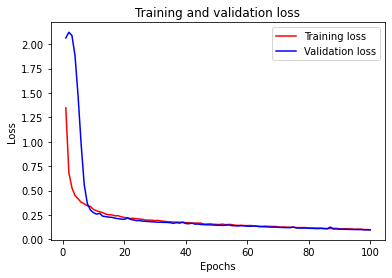

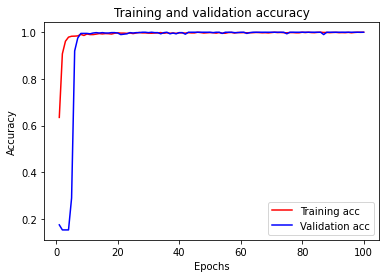

In [32]:
plot_history(history)